In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv('/home/giang/Desktop/plant-pathology-2020-fgvc7/train.csv')
# print(df.head())
label = []
a_df = np.array(df)

for line in a_df:
    label.append(np.where(line==1)[0][0]-1)

name = df.image_id
    
boxes = {'image_id': name,
         'labels': label}

dataFrame = pd.DataFrame(boxes)

IDs = dataFrame.image_id.to_list()
labels = dataFrame.labels.to_list()
train ,val, y_train,y_val = train_test_split(IDs, labels, test_size = 0.2, random_state = 42, shuffle = True)


In [7]:
print(len(train))
print(len(val))
print(len(y_train))
print(len(y_val))

1456
365
1456
365


In [19]:

def extractLabelsNums(y):
    y = np.array(y)
    print(np.wherey==2)
    class0 = np.where(y==0)
    class1 = np.where(y==1)
    class2 = np.where(y==2)
    class3 = np.where(y==3)
    return len(class0), len(class1), len(class2), len(class3)
extractLabelsNums(y_train)

[ True False False ...  True False  True]


(1, 1, 1, 1)

In [35]:
import numpy as np

temp = [[0.2388601,  0.23554276, 0.2805922,  0.24500495],
 [0.25035995, 0.27317065, 0.25899142, 0.21747795],
 [0.2560388 , 0.26381588, 0.24825904, 0.2318863 ],
 [0.26799977, 0.26863286, 0.23195203, 0.2314154 ]]
y_true = np.array([0,1,2,3])
temp = np.argmax(temp,axis = 1)
print(temp==y_true)
def accuracy(y_true, predict):
    return np.round(sum(y_true == predict)/(y_true.shape[0]),4)
# print(np.argmax(temp,axis = 1).shape[0])
accuracy(y_true, temp)

[False  True False False]


0.25

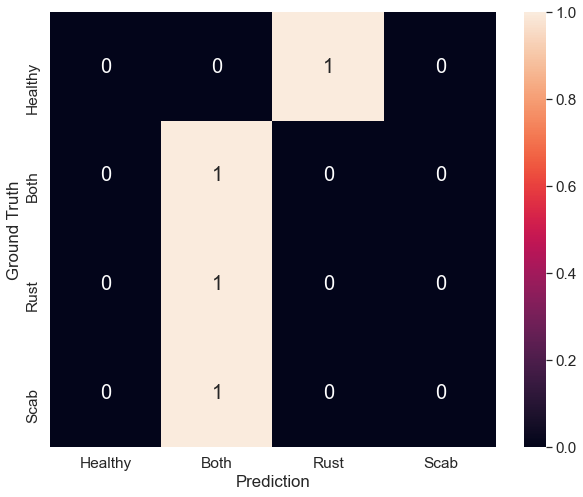

In [24]:
from matplotlib import pyplot as plt
import pandas as pd
import sklearn.metrics as sk
import seaborn as sn

def confusion_matrix(y_true, predict_score, class_name, save_path):
    
#     y_true = np.reshape(y_true, [max(y_true.shape)])
#     predict_score = np.reshape(predict_score, [max(predict_score.shape)])
#     predict = predict_score > 0.5
    confusion = np.round(sk.confusion_matrix(y_true,predict_score))
    df_cm = pd.DataFrame(confusion, index = class_name,
                    columns = class_name)
    plt.figure(figsize = (10,8))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, fmt="d")
    plt.xlabel('Prediction')
    plt.ylabel('Ground Truth')
    plt.savefig(save_path)
    
class_name = ['Healthy','Both','Rust','Scab']
y_true = np.array([0,1,2,3])
temp = [[0.2388601,  0.23554276, 0.2805922,  0.24500495],
 [0.25035995, 0.27317065, 0.25899142, 0.21747795],
 [0.2560388 , 0.26381588, 0.24825904, 0.2318863 ],
 [0.26799977, 0.26863286, 0.23195203, 0.2314154 ]]
temp = np.argmax(temp,axis = 1)
confusion_matrix(y_true, temp, class_name, '')